In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Walmart Data Analysis and Forcasting.csv")

using read_csv ,i am abel to fetch all records of csv file into df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


from info(), we confirm that there are no null values in our file 

we have converted object to datetime dtype because object consumes more space

In [5]:
df.duplicated().value_counts()

False    6435
Name: count, dtype: int64

we confirmed that there are no duplicate value in our file, since the false count is matching with no.of rows 

# store analysis

In [6]:
df['Store'].value_counts().sort_index()

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: count, dtype: int64

Therefore we have 45 distinct number of stores and an information over a period of 143 weeks

## 1)lets count to number of holidays for each store

In [7]:
df.groupby('Store')['Holiday_Flag'].sum()

Store
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
40    10
41    10
42    10
43    10
44    10
45    10
Name: Holiday_Flag, dtype: int64

It shows that each store has 10 holiday weeks

## store analysis

In [8]:
t1=df.groupby('Store')['Weekly_Sales'].max()
print(t1.sort_values(ascending=False).head(1))
print(t1.sort_values(ascending=False).tail(1))

Store
14    3818686.45
Name: Weekly_Sales, dtype: float64
Store
33    331173.51
Name: Weekly_Sales, dtype: float64


From this we can say that store 14 grabs the first position and store 33 is at last in highest weekly sales

In [9]:
t2=df.groupby('Store')['Weekly_Sales'].min()
print(t2.sort_values(ascending=False).head(1))
print(t2.sort_values(ascending=False).tail(1))

Store
4    1762539.3
Name: Weekly_Sales, dtype: float64
Store
33    209986.25
Name: Weekly_Sales, dtype: float64


we can conclude that store 33 has less margin in weekly_sales when compared to others.
store 4 stands at first position, it means in tough times also it performed well when compared to others

In [10]:
t3=df.groupby('Store')['Temperature'].max().sort_values()
print(t3.head(1))
print(t3.tail(1))
t3=df.groupby('Store')['Temperature'].min().sort_values()
print(t3.head(1))
print(t3.tail(1))

Store
7    68.84
Name: Temperature, dtype: float64
Store
33    100.14
Name: Temperature, dtype: float64
Store
7   -2.06
Name: Temperature, dtype: float64
Store
33    46.25
Name: Temperature, dtype: float64


from above we can interpret, In store 7 region the max and min recorded temp are 68.84 and -2.06 .
In store 33 region we have the max and min recorded temp are 100.14 and 46.25.
Therefore store 33 is in hot climate zone and store 7 is in cool climate zone.


In [11]:
t3=df.groupby('Store')['Fuel_Price'].max().sort_values()
print('MAX VALUES')
print(t3.head(1))
print(t3.tail(1))
t3=df.groupby('Store')['Fuel_Price'].min().sort_values()
print('MIN VALUES')
print(t3.head(1))
print(t3.tail(1))

MAX VALUES
Store
13    3.845
Name: Fuel_Price, dtype: float64
Store
33    4.468
Name: Fuel_Price, dtype: float64
MIN VALUES
Store
36    2.472
Name: Fuel_Price, dtype: float64
Store
27    2.837
Name: Fuel_Price, dtype: float64


from above we can interpret, In store 33 region the max fuel price is 4.4 compared to rest.In store 36 region the max fuel price is 2.4 compared to rest.

In [12]:
t3=df.groupby('Store')['CPI'].max().sort_values()
print('MAX VALUES')
print(t3.head(1))
print(t3.tail(1))
t3=df.groupby('Store')['CPI'].min().sort_values()
print('MIN VALUES')
print(t3.head(1))
print(t3.tail(1))

MAX VALUES
Store
28    131.193097
Name: CPI, dtype: float64
Store
9    227.232807
Name: CPI, dtype: float64
MIN VALUES
Store
28    126.064
Name: CPI, dtype: float64
Store
9    213.846982
Name: CPI, dtype: float64


from above we can understand, store 9 has max CPI index and store 28 has min cpi index.
As CPI id directly proportional to purchasing power and rate ofchange in cost.
that means in store 9 region the increase in rate of cost is more when compared to others 

In [13]:
t3=df.groupby('Store')['Unemployment'].max().sort_values()
print('MAX VALUES')
print(t3.head(1))
print(t3.tail(1))
t3=df.groupby('Store')['Unemployment'].min().sort_values()
print('MIN VALUES')
print(t3.head(1))
print(t3.tail(1))

MAX VALUES
Store
23    5.892
Name: Unemployment, dtype: float64
Store
12    14.313
Name: Unemployment, dtype: float64
MIN VALUES
Store
4    3.879
Name: Unemployment, dtype: float64
Store
28    10.199
Name: Unemployment, dtype: float64


more unemplyment zone is store 12 region and less unemployment zone is store 4 region

<Axes: xlabel='Store', ylabel='Unemployment'>

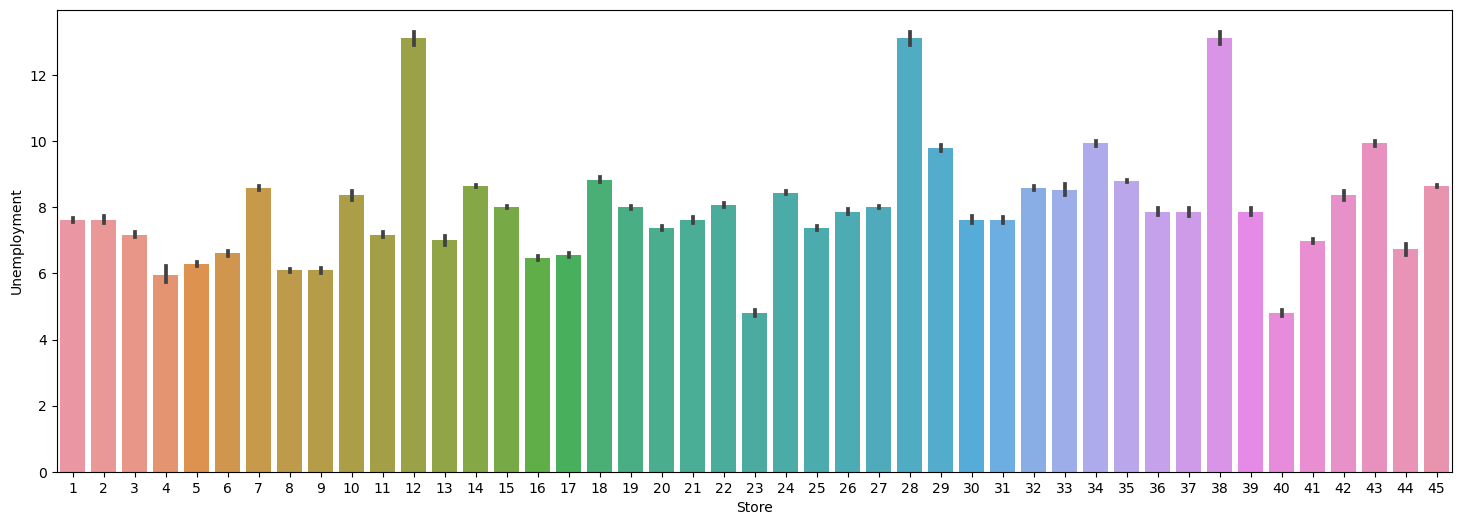

In [14]:
plt.figure(figsize=(18,6))
sns.barplot(data=df,x='Store',y='Unemployment')

## Date analysis

In [15]:
df['Year']=pd.DatetimeIndex(df['Date']).year

In [16]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Week']=pd.DatetimeIndex(df['Date']).weekday
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,3
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,0
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4


using year,month,weekday we extracted them from date column and creatednew columns

In [17]:
df=df.drop(axis=1,columns='Date')
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,3
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4


since we have no use with Date column we have dropped it from the table.

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

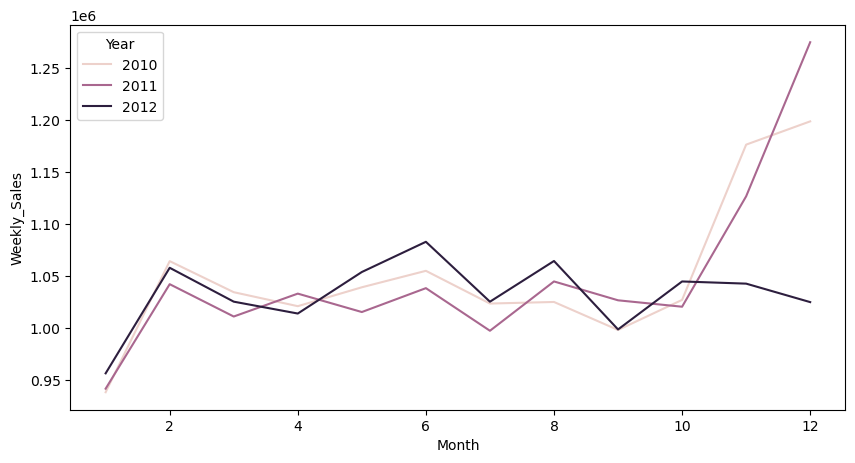

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Month',y='Weekly_Sales',hue='Year',ci=None)

from above graph we can see fall and pickup in 2010,2011,2012 recorded on months perspective

<Axes: xlabel='Month', ylabel='Temperature'>

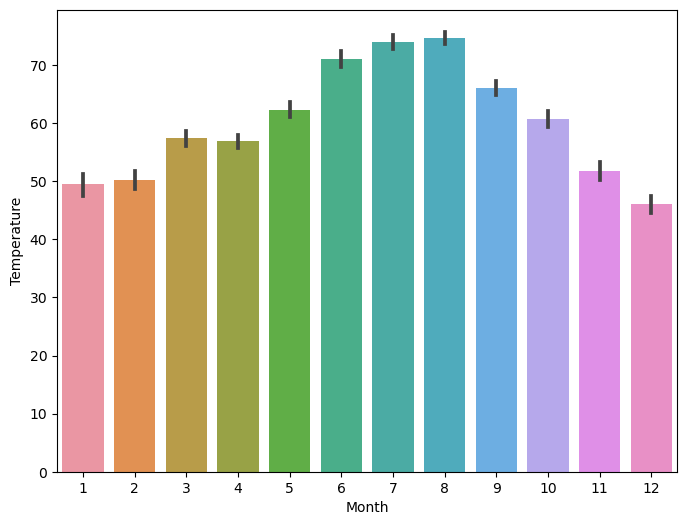

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x='Month',y='Temperature')

we can see a steady raise in temperature from jan to july and fall from august to december

<Axes: xlabel='Month', ylabel='CPI'>

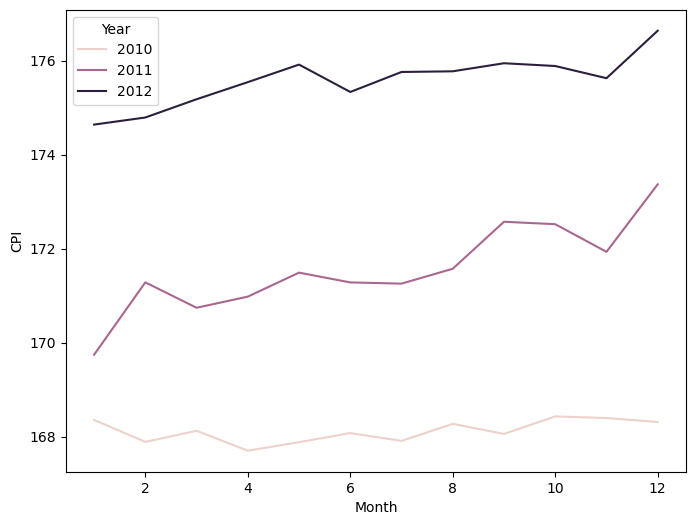

In [20]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='Month',y='CPI',hue='Year',ci=None)

we see a consumer price index(CPI) increase rate from 2010 to 2011

<Axes: xlabel='Year', ylabel='Fuel_Price'>

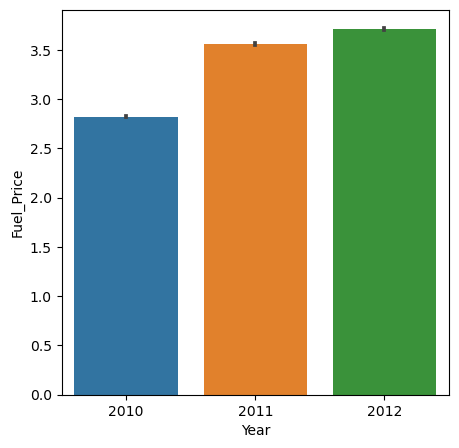

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='Year',y='Fuel_Price')

we can see fuel price is increased from 2010-2012 and have highest prices in 2012

## Lets findout heatmap to how strongly the each column is related

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year              int32
Month             int32
Week              int32
dtype: object

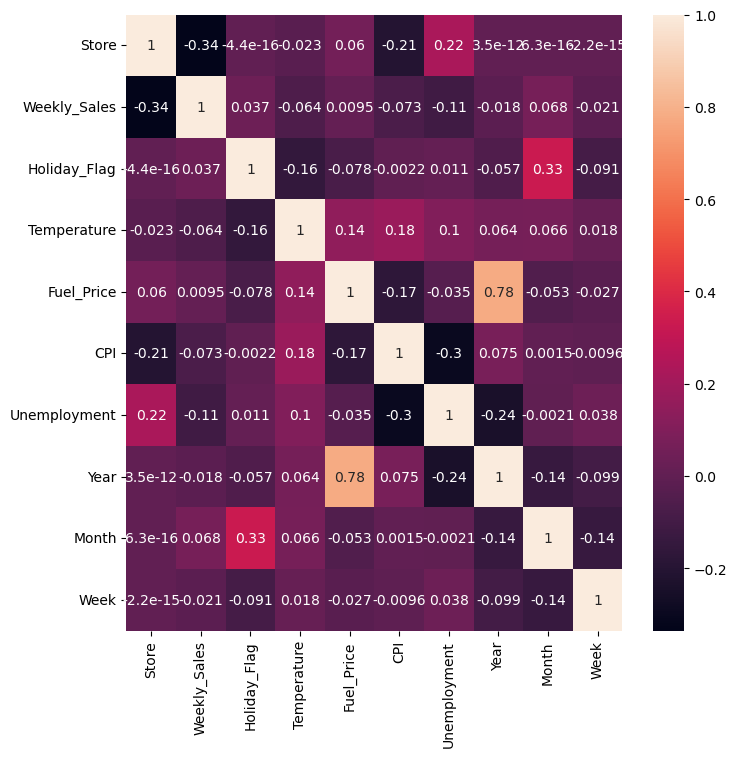

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
df.dtypes

from heatmap we can say year and Fuelprice are strongly couples, with increase in year there is 0.78 increase rate in fuel price

# analysis of weekly_sales

{'whiskers': [<matplotlib.lines.Line2D at 0x1372fda9350>,
 'caps': [<matplotlib.lines.Line2D at 0x1372fdaa210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1372fda8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1372fdab390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1372fdabb50>],
 'means': []}

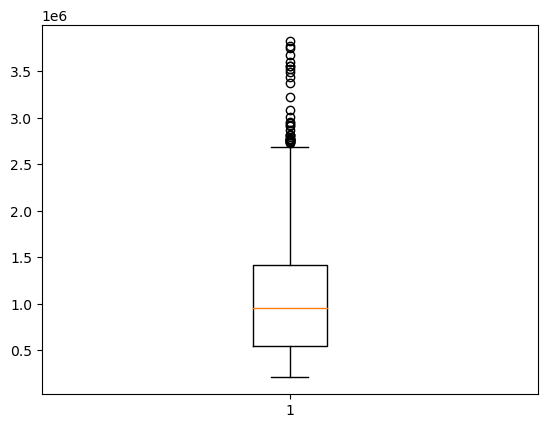

In [23]:
plt.boxplot(df['Weekly_Sales'])

from boxplot we see 25% is around o.6*10 power 6, 50% is around 1*1e6 and 75% is around 1.4*10 power 6 and outliers above 2700000

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

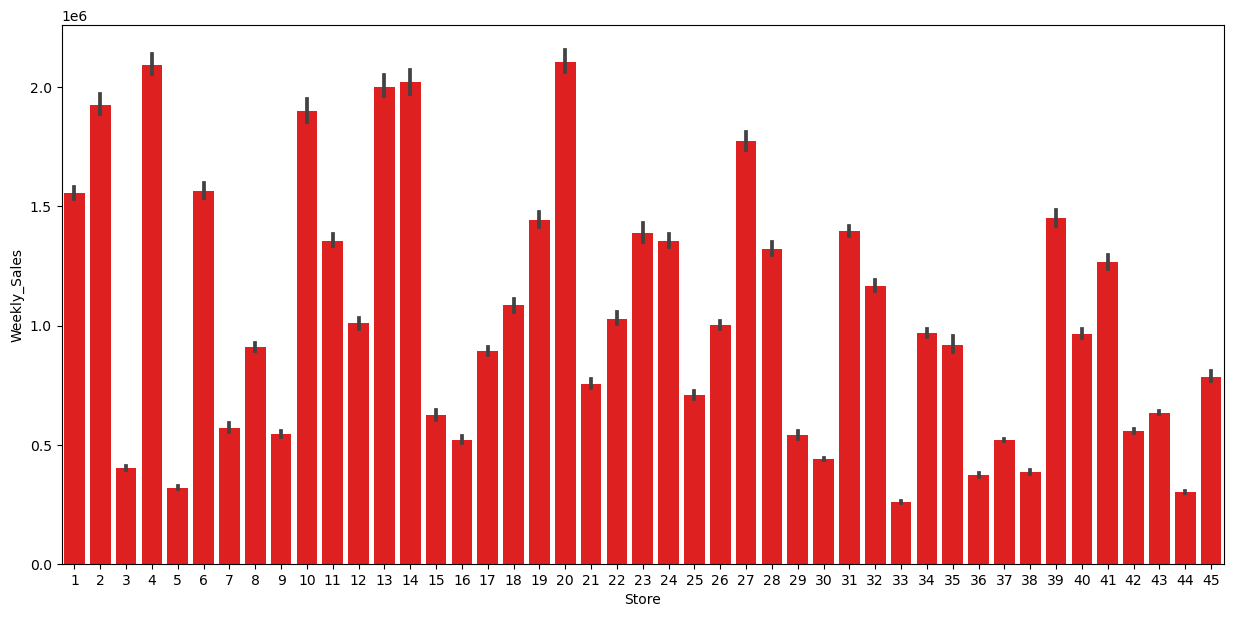

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Store',y='Weekly_Sales',color='Red')

used bargraph to visualise each store  weekly_sales

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

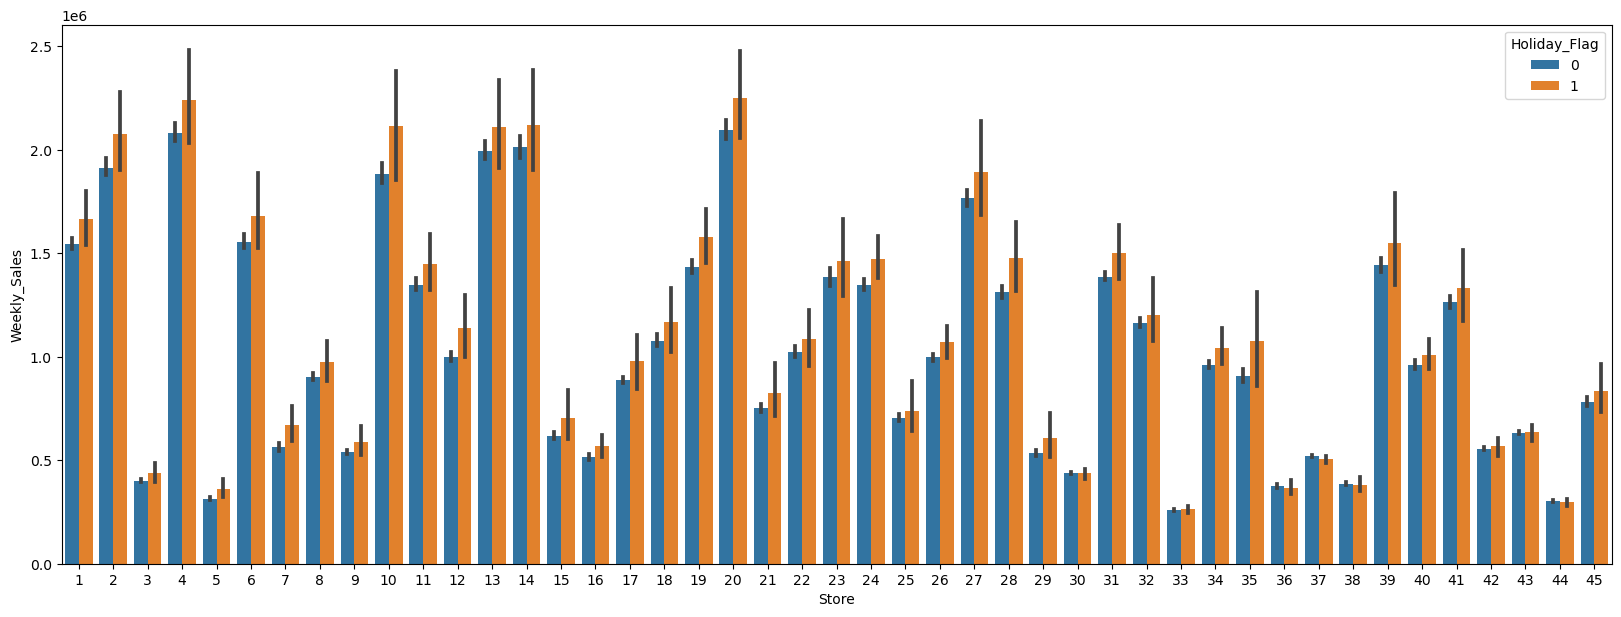

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x='Store',y='Weekly_Sales',hue='Holiday_Flag')

now we can visualize weekly sales of each store in holiday and working week

<Axes: xlabel='Month', ylabel='Unemployment'>

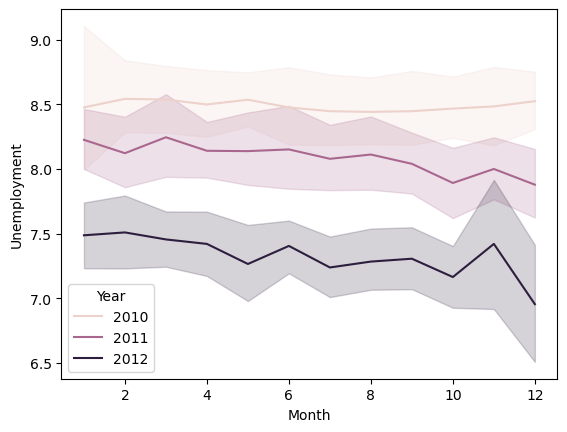

In [26]:
sns.lineplot(data=df, x="Month", y="Unemployment", hue="Year")

we can say that unemployment is decreased from day to dat in span of 3 years

{'whiskers': [<matplotlib.lines.Line2D at 0x13730a6e7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13730a6ff50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13730a6dc50>],
 'medians': [<matplotlib.lines.Line2D at 0x13730a79510>],
 'fliers': [<matplotlib.lines.Line2D at 0x13730a46350>],
 'means': []}

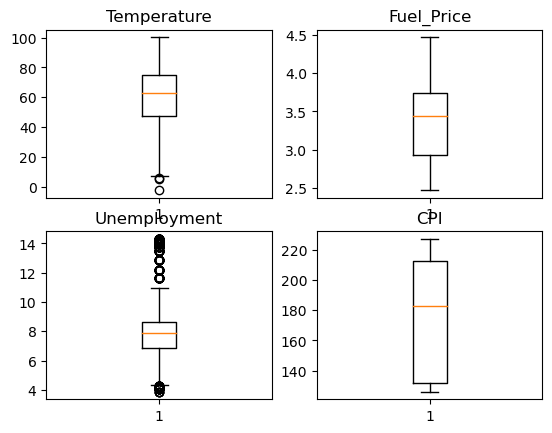

In [27]:
plt.figure()
plt.subplot(2,2,1)
plt.title('Temperature')
plt.boxplot(df['Temperature'])
plt.subplot(2,2,2)
plt.title('Fuel_Price')
plt.boxplot(df['Fuel_Price'])
plt.subplot(2,2,3)
plt.title('Unemployment')
plt.boxplot(df['Unemployment'])
plt.subplot(2,2,4)
plt.title('CPI')
plt.boxplot(df['CPI'])

since all four columns are flot type , we can draw boxplot for each column and understand the range of entries for respective columns